<a href="https://colab.research.google.com/github/ddekun/Data_analysis_algorithms/blob/lesson3/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритмы анализа данных

## Урок 3. Логистическая регрессия. Log Loss

### Домашнее задание

**1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [4]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [6]:
def calc_logloss(y, y_pred):
    err = 0
    for i in range(len(y)):
        if y_pred[i] == 0:
            err += (1.0 - y[i]) * np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err += y[i] * np.log(y_pred[i])
        else:
            err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    return - err / len(y)

In [7]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

0.05268025782891314

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:

z = np.linspace(-10, 10, 101)

In [15]:
probabilities = sigmoid(z)

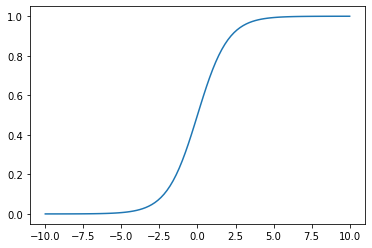

In [16]:
plt.plot(z, probabilities)
plt.show()

In [17]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.4967106  -0.13829138  0.6476652   1.52301741] 0.760958797591889
50 [ 0.49653276 -0.13964506  0.64649853  1.52239548] 0.7602363860386216
100 [ 0.49635422 -0.14099791  0.64533277  1.52177448] 0.7595150284215482
150 [ 0.496175   -0.14234992  0.64416792  1.5211544 ] 0.7587947248247462
200 [ 0.49599509 -0.14370111  0.64300398  1.52053525] 0.7580754753308987
250 [ 0.4958145  -0.14505147  0.64184096  1.51991703] 0.7573572800212871
300 [ 0.49563322 -0.14640099  0.64067885  1.51929974] 0.7566401389758188
350 [ 0.49545126 -0.14774968  0.63951766  1.51868337] 0.7559240522730254
400 [ 0.49526862 -0.14909754  0.63835738  1.51806794] 0.7552090199900762
450 [ 0.4950853  -0.15044456  0.63719802  1.51745344] 0.7544950422027925


In [19]:
#     ИЗМЕНЕНИЯ
W = eval_model(X_st, y, iterations=1000, eta=0.7)

0 [ 0.47186474 -0.32783796  0.48428984  1.43589401] 0.760958797591889
100 [ 0.0644048  -2.45695645 -0.94912337  3.8615032 ] 0.30305066238325984
200 [ 0.24866488 -2.98703594 -1.58384957  5.173296  ] 0.2674824945486562
300 [ 0.42312674 -3.35122403 -2.07170295  6.15156269] 0.24795024023224982
400 [ 0.58029984 -3.65958863 -2.48045733  6.98162526] 0.2339608874265411
500 [ 0.72291237 -3.93905198 -2.83986792  7.72385091] 0.22281416762827827
600 [ 0.85376956 -4.19885354 -3.16507243  8.40481733] 0.21345410878440604
700 [ 0.97493761 -4.44318283 -3.46455813  9.03859807] 0.2053607303915983
800 [ 1.08791081 -4.67443085 -3.74350839  9.63370947] 0.19823486450410455
900 [ 1.19380592 -4.89420797 -4.00534886 10.19586235] 0.19188383674617543


**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [20]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [21]:
calc_pred_proba(W, X_st)

array([3.66289977e-01, 9.10270925e-02, 9.99897706e-01, 1.76940775e-04,
       7.77017424e-01, 2.01984029e-01, 9.99982148e-01, 7.81550649e-02,
       4.72548089e-01, 9.99085589e-01])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [23]:
def calc_pred(W, X):
    y_pred_proba = calc_pred_proba(W, X)
    y_pred = np.where(y_pred_proba > 0.7, 1, 0)
    return y_pred

In [24]:
pred = calc_pred(W, X_st)
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

**5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.**

**Accuracy**

In [25]:
def accuracy(y, y_pred):
    accuracy = np.mean(y == y_pred)
    return accuracy

In [26]:
accuracy(y, pred)

0.9

**Confusion Matrix**

In [27]:
def confusion_matrix(y, y_pred):
    cm = np.zeros((2, 2))
    for i in range(len(y)): 
        if y[i] == y_pred[i] ==  0: # TN
            cm[0][0] += 1
        elif y[i] == y_pred[i] == 1: # TP 
            cm[1][1] += 1
        elif y[i] != y_pred[i] and y[i] == 1:
            cm[1][0] += 1
        elif y[i] != y_pred[i] and y[i] == 1: # FN
            cm[0][1] += 1
    return cm

In [28]:
cm = confusion_matrix(y, pred)
cm

array([[5., 0.],
       [1., 4.]])

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y, pred)

array([[5, 0],
       [1, 4]])

**Precision**

In [31]:
def precision(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TN = cm[0][0]
    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    precision = TP / (TP + FP)
    return precision

In [32]:
precision(y, pred)

1.0

In [33]:
from sklearn.metrics import precision_score

In [34]:
precision_score(y, pred)

1.0

**Recall**

In [35]:
def recall(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    TN = cm[0][0]
    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    recall = TP / (TP + FN)
    return recall

In [36]:
recall(y, pred)

0.8

In [37]:
from sklearn.metrics import recall_score

In [38]:
recall_score(y, pred)

0.8

**F-score**

In [39]:
def f_score(y, y_pred):
    pr = precision(y, y_pred)
    rec = recall(y, y_pred)
    f_score = 2 * pr * rec / (pr + rec)
    return f_score

In [40]:
f_score(y, pred)

0.888888888888889

In [41]:
from sklearn.metrics import f1_score

In [43]:
f1_score(y, pred)

0.888888888888889

**6. Могла ли модель переобучиться? Почему?**

Да, могла переобучиться, так как в наборе данных мало значений.